In [19]:
#必要なライブラリを予めすべてインポート
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [97]:
#CSVデータをDF形式で読み込み。 indexにdateを設定
rowdata = pd.read_csv('/Users/hayato1986/Documents/analysis/data/tantantigerdata.csv', 
                      parse_dates=['日付'],index_col=['日付'], dayfirst=True)
rowdata['week'] = rowdata.index.weekday #曜日を追加

In [98]:
#データ概要1.
rowdata.head(3)

,来客数 の SUM,売上 の SUM,単価 の AVERAGE,リピート数 の SUM,新規のSUM,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),最大風速(m/s),最大風速(m/s).1,平均蒸気圧(hPa),平均雲量(10分比),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時),week
日付,,,,,,,,,,,,,,,,,,
2016-09-19,86,86900,1013.354037,41,45,21.3,22.9,19.2,21.5,0.0,2.6,4.4,北東,24.3,10.0,雨一時曇,大雨,0
2016-09-20,57,54300,950.539867,25,32,19.1,20.1,17.6,91.5,0.0,3.0,6.2,北西,22.1,10.0,大雨,大雨後曇,1
2016-09-21,72,67850,948.809524,25,47,20.1,23.2,17.6,0.0,0.1,2.5,4.9,北東,20.2,10.0,曇後一時雨,雨時々曇,2


In [147]:
#データ概要2
rowdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2016-09-19 to 2016-12-12
Data columns (total 18 columns):
来客数 の SUM            72 non-null int64
売上 の SUM             72 non-null int64
単価 の AVERAGE         72 non-null float64
リピート数 の SUM          72 non-null int64
新規のSUM               72 non-null int64
平均気温(℃)              72 non-null float64
最高気温(℃)              72 non-null float64
最低気温(℃)              72 non-null float64
降水量の合計(mm)           72 non-null float64
日照時間(時間)             72 non-null float64
平均風速(m/s)            72 non-null float64
最大風速(m/s)            72 non-null float64
最大風速(m/s).1          72 non-null object
平均蒸気圧(hPa)           72 non-null float64
平均雲量(10分比)           72 non-null float64
天気概況(昼：06時〜18時)      72 non-null object
天気概況(夜：18時〜翌日06時)    72 non-null object
week                 72 non-null int32
dtypes: float64(10), int32(1), int64(4), object(3)
memory usage: 10.4+ KB


In [100]:
#データ概要3
rowdata.describe()

,来客数 の SUM,売上 の SUM,単価 の AVERAGE,リピート数 の SUM,新規のSUM,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),最大風速(m/s),平均蒸気圧(hPa),平均雲量(10分比),week
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,79.694444,77870.833333,979.282571,32.013889,47.680556,15.472222,19.411111,12.143056,5.680556,4.126389,2.470833,5.291667,13.723611,7.476389,2.638889
std,18.026302,18226.750095,20.540748,9.623172,14.924058,5.653373,5.741118,5.921477,14.709465,3.607035,0.690874,1.636016,6.767164,2.812071,2.009173
min,28.000000,26600.000000,937.735849,13.000000,14.000000,2.800000,8.600000,0.300000,0.000000,0.000000,1.200000,3.000000,4.100000,0.300000,0.000000
25%,69.500000,67587.500000,962.830463,25.000000,36.500000,11.100000,14.700000,8.050000,0.000000,0.175000,1.900000,4.175000,8.475000,5.225000,1.000000
50%,78.000000,77100.000000,980.109756,31.500000,47.000000,14.000000,19.100000,10.500000,0.000000,3.350000,2.350000,4.700000,11.850000,8.650000,2.500000
75%,90.250000,87750.000000,992.044868,37.750000,58.000000,20.275000,23.225000,17.600000,2.500000,7.600000,2.925000,6.250000,19.075000,10.000000,4.000000
max,128.000000,126450.000000,1027.246377,56.000000,84.000000,26.500000,32.000000,24.000000,91.500000,10.000000,4.900000,10.300000,29.600000,10.000000,6.000000


***
# タンタンタイガーの下半期売上分析
## Objective(目的)＆Why (なぜやるのか)
タンタンタイガーの下半期売上データに対する分析をする。
各データから意味を抽出して、売上に影響している要因を見つけ出し、改善アクションにつなげることを目的とする。

## Data for deep dive (見てみるデータ)
1. 時系列における売上の推移はどうなっているか
 - 開店直後からの数値推移
 - 新規顧客の推移
 - リピーターの推移
2. 天候による売上の相関関係はどうなっているか
 - 気温と売上の相関
 - 天気と売上の相関
3. 売上の回帰モデルはどうなっているか
 - 重回帰式の作成と妥当性の検証


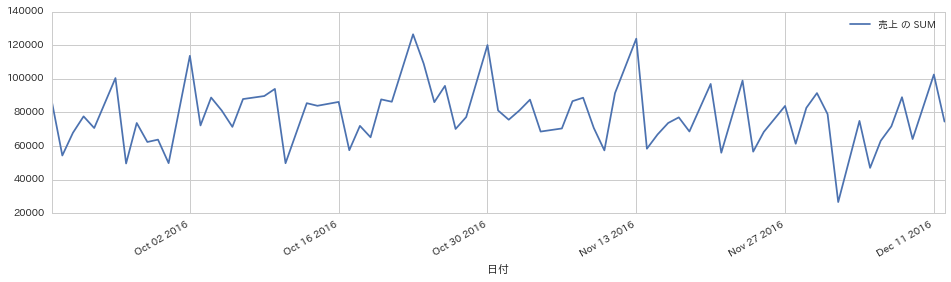

In [101]:
#1. 時系列における売上の推移はどうなっているか
rowdata['売上 の SUM'].plot(legend=True, figsize=(16, 4))

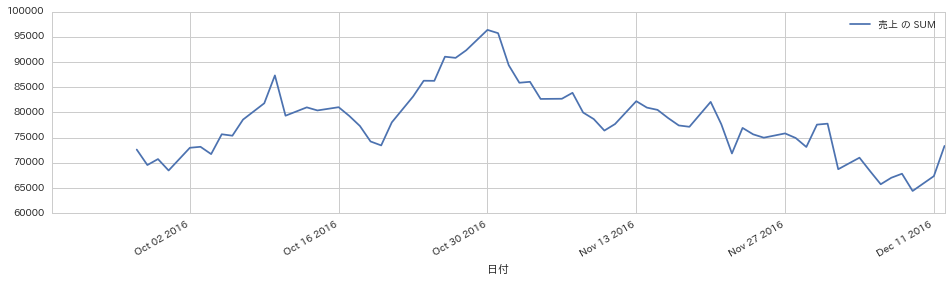

In [102]:
#よくわからないので移動平均的で出す。
rowdata_rolling = rowdata.rolling(window=8, min_periods=8).mean() #8日の移動平均
rowdata_rolling['売上 の SUM'].plot(legend=True, figsize=(16, 4))


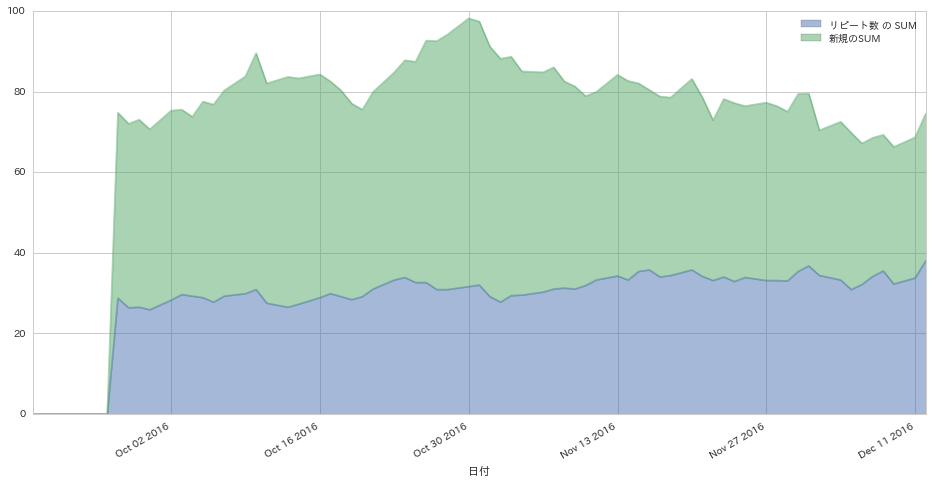

In [103]:
rowdata_rolling.loc[:,['リピート数 の SUM','新規のSUM']].plot(
    legend=True, figsize=(16, 8), y=['リピート数 の SUM','新規のSUM']
          , kind='area', stacked=True, alpha=0.5
)

- リピーター数は伸びている
- 新規は10月22日のTVCMで大きく増えたが少し右肩下がり
- リピーター数が伸びているので新規の落ち込みをカバーしている。全体では減ってない

# 2. 天候による売上の相関関係はどうなっているか


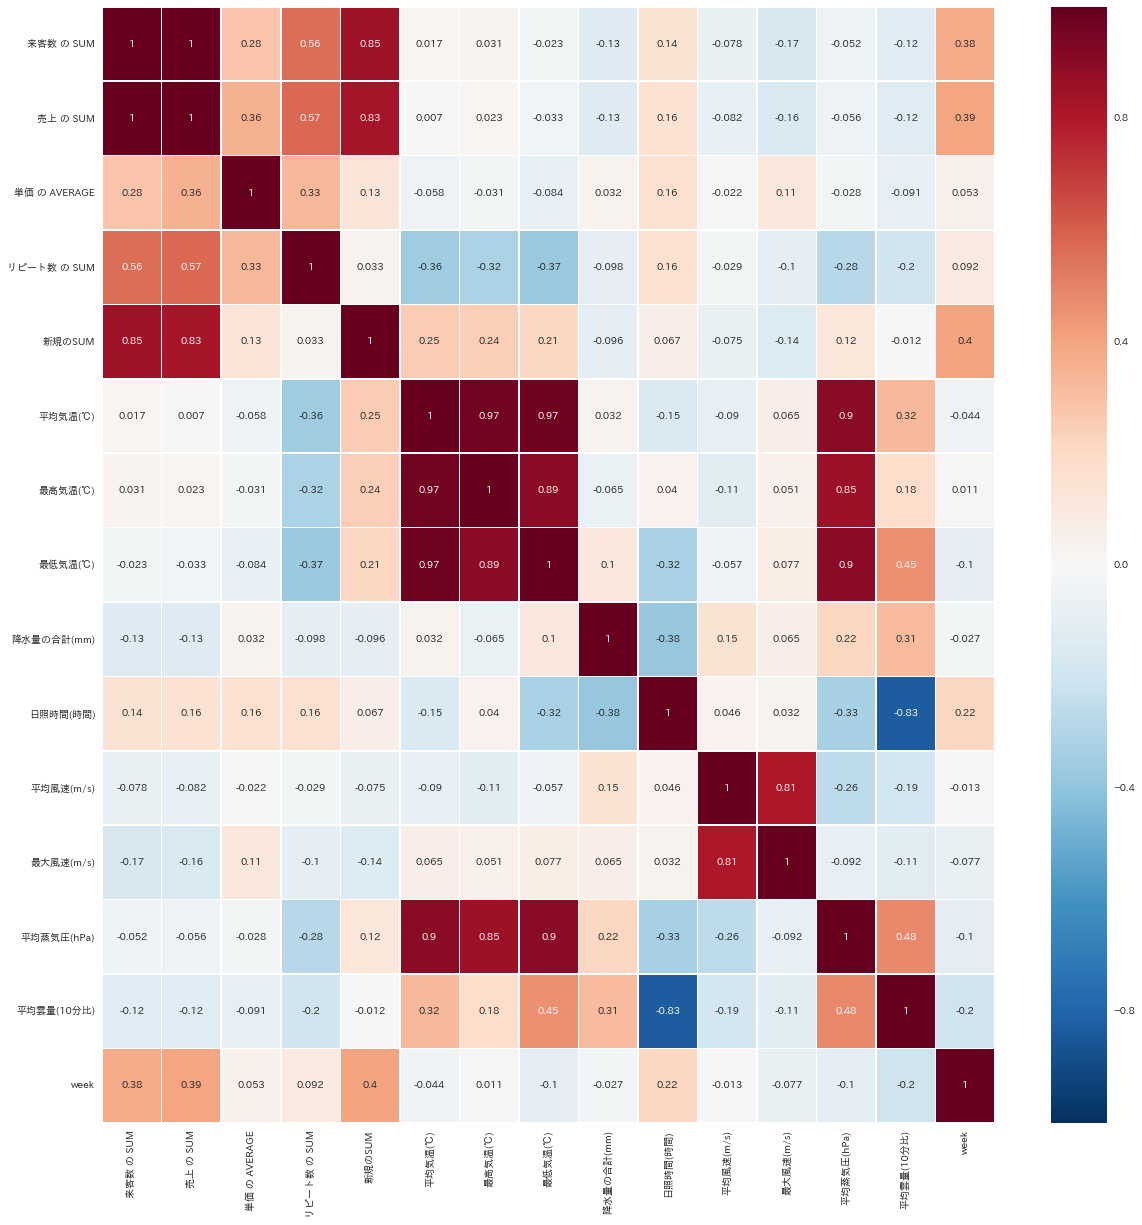

In [165]:
#とりあえず変数すべてで相関のヒートマップを見てみよう
fig, ax = plt.subplots(figsize=(20,20)) #Sizeを定義する
sns.heatmap(rowdata.corr() ,annot=True, linewidths=.5, ax=ax)

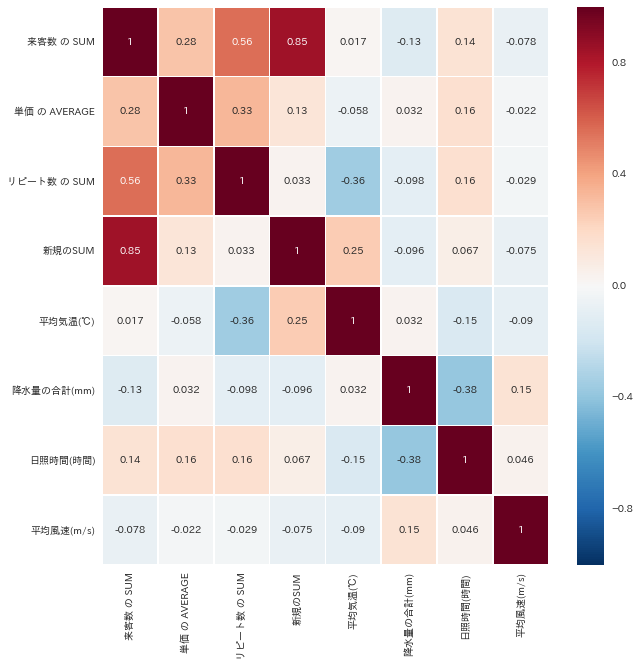

In [178]:
#よくわからないので相関がないところを削除していく。
fig, ax = plt.subplots(figsize=(10,10)) #Sizeを定義する
data = rowdata.drop(['week','最大風速(m/s).1','平均雲量(10分比)','平均蒸気圧(hPa)','最高気温(℃)','最低気温(℃)','最大風速(m/s)','売上 の SUM'], axis=1)
sns.heatmap(data.corr() ,annot=True, linewidths=.5, ax=ax)

- リピート数と単価平均に相関が見られそう
- 平均気温とリピート数に負の相関があるかも。逆に新規には正の相関？
- 雨と来店数はあんまり関係なさそう
- 風はすべての数値にほとんど関係ない
- 来客数は新規の数で決まることが多そう


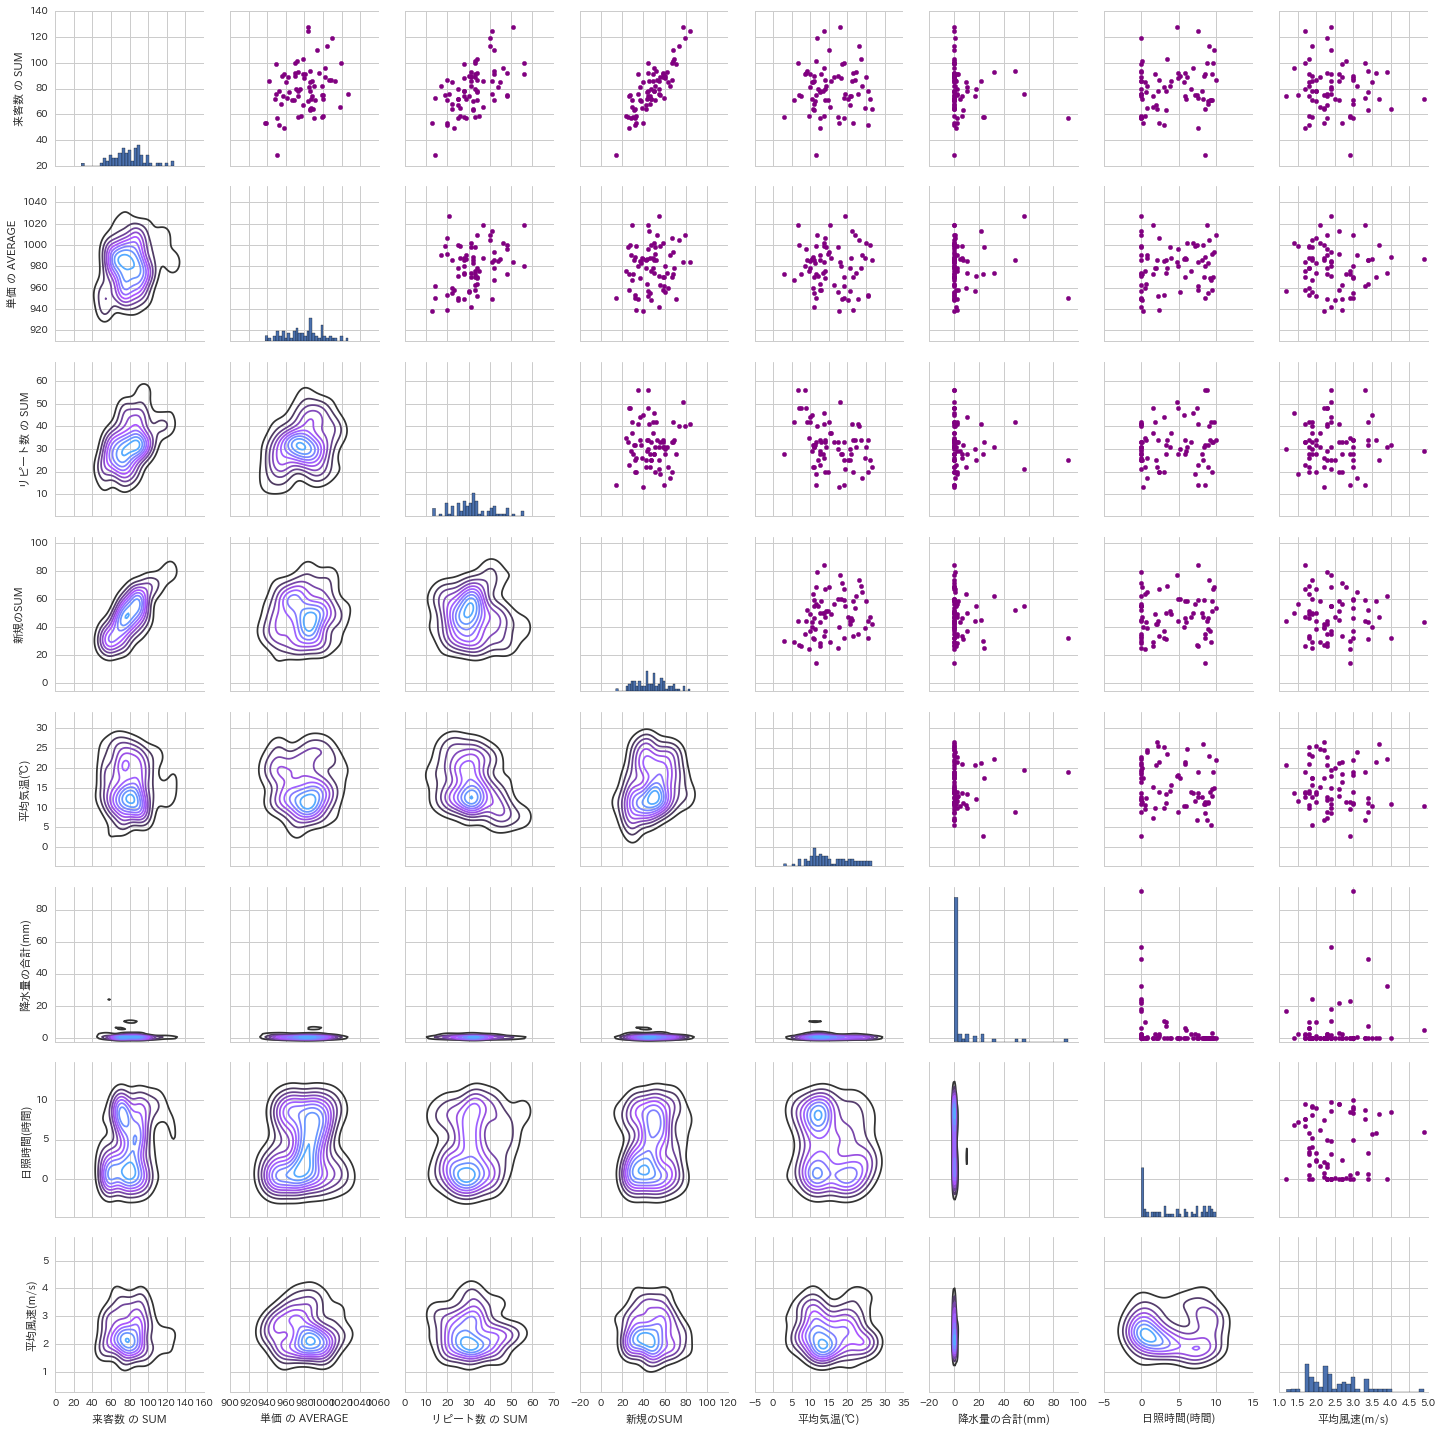

In [181]:
#散布図を書く
#sns.pairplot(data) #これだと散布図だけなので、PairGridする。

returns_fig = sns.PairGrid(data)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=10)